# Machine Learning Project -1   (Linear Regression)
 
## Problem Statement : 

One of the largest retail chains in the world wants to use their vast data source to **build an efficient forecasting model to predict the sales for each SKU(stock-keeping unit) in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis.** Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So **we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.**
## Data Description

**`
Variable             |  Definition
`**

`
record_ID            | Unique ID for each week store sku combination
week                 | Starting Date of the week
store_id             | Unique ID for each store (no numerical order to be assumed)
sku_id               | Unique ID for each product (no numerical order to be assumed)
total_price          | Sales Price of the product
base_price           | Base price of the product
is_featured_sku      | Was part of the featured item of the week
is_display_sku       | Product was on display at a prominent place at the store
units_sold           | (Target) Total Units sold for that week-store-sku combination
`

## Evaluation Metric
The evaluation metric is 100*RMSLE (Root Mean Squared Log Error).
The basic objective is to implement the project with linear regression and comes up with as much accuracy we can . 
Do record yourself as well. 

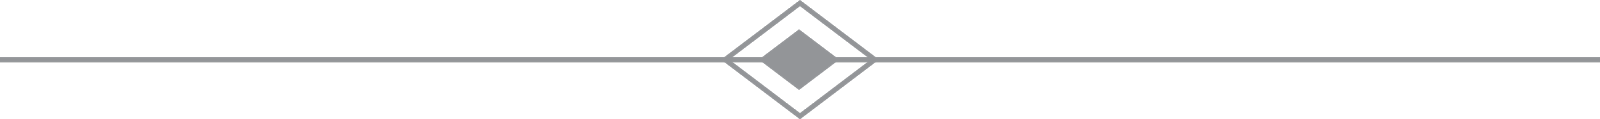

In [1]:
'''Importing Important Libraires'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training and testing data
train = pd.read_csv(r"D:\Analytcs Vidhya\Projects\ML Project 1\train_0irEZ2H.csv")
test = pd.read_csv(r"D:\Analytcs Vidhya\Projects\ML Project 1\test_nfaJ3J5.csv")
print(f"The number of rows in the train data are \033[1m{train.shape[0]}\033[0m whereas in the test data are \033[1m{test.shape[0]}\033[0m"
     f"\nThe total Number of features given in the data are {train.shape[1]}.")

The number of rows in the train data are 150150 whereas in the test data are 13860
The total Number of features given in the data are 9.


In the given problem statement, **`units_sold`** is the target variable, which we will predict using the regression models. First of all we check the datatypes of all the columns.

In [3]:
train.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

In [4]:
test.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
dtype: object

From the above dtypes, we see that majority of the columns are of numerical data type. **`record_ID`** is the unique identification number as mentioned in the data description. So we can remove it from the datasets (both training and testing). **`week`** is a datetime datatype, which is given as an object. We typecast it to datetime datatype. **`is_featured_sku`** and **`is_display_sku`** are categorical features. **`store_id`** and **`sku_id`** are both unique ids for the stores and products respectively. Both of these features are categorical as well.

In [5]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [6]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [7]:
# making a copy of train and test data
ds1 = train.copy()
ds2 = test.copy()
ds1.drop(['record_ID'], axis = 1, inplace = True)
ds2.drop(['record_ID'], axis = 1, inplace = True)

# Typecasting of the features
ds1['week'] = pd.to_datetime(ds1['week'])
ds2['week'] = pd.to_datetime(ds2['week'])

ds1['store_id'] = ds1['store_id'].astype('category')
ds2['store_id'] = ds2['store_id'].astype('category')

ds1['sku_id'] = ds1['sku_id'].astype('category')
ds2['sku_id'] = ds2['sku_id'].astype('category')

ds1['is_featured_sku'] = ds1['is_featured_sku'].astype('category')
ds2['is_featured_sku'] = ds2['is_featured_sku'].astype('category')

ds1['is_display_sku'] = ds1['is_display_sku'].astype('category')
ds2['is_display_sku'] = ds2['is_display_sku'].astype('category')

Now that we have typecasted the columns, we will now segregate the numerical and categorical columns for the EDA.

In [8]:
num_col = list(ds1.select_dtypes(include = ['int64', 'float64']).columns)
cat_col = list(ds1.select_dtypes(exclude = ['int64', 'float64']).columns)
print(f"There are total {len(num_col)} numerical columns and {len(cat_col)} categorical columns.")

There are total 3 numerical columns and 5 categorical columns.


# Exploratory Data Analysis:
We will now begin the EDA.
## Univariate Analysis of Numeical Features-
First of all, we look at the distribution of the numerical columns:

In [9]:
plt.style.use('default')

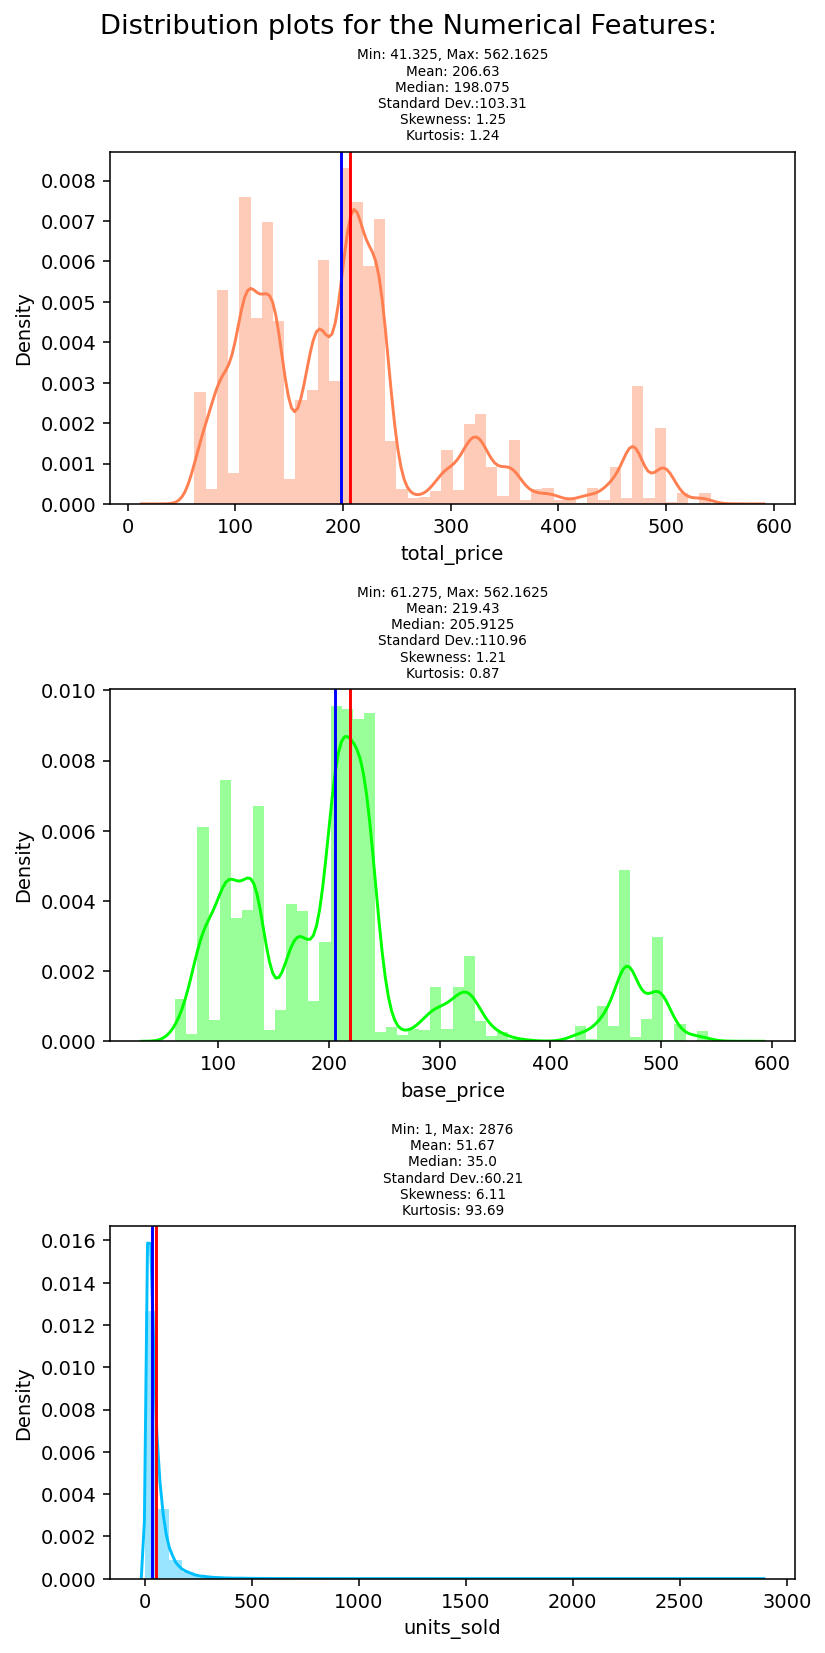

In [10]:
num_colour = ['coral', 'lime', 'deepskyblue']
plt.figure(figsize = (6, 4*len(num_col)), dpi = 140)
# plt.suptitle("Distribution plots for the Numerical Features:", fontsize = 18)
for i in range(0, len(num_col)):

# Calculating the central tendency and spread of the data.
    min_val = ds1[num_col[i]].min()
    max_val = ds1[num_col[i]].max()
    rang = max_val-min_val
    mean_val = ds1[num_col[i]].mean()
    median_val = ds1[num_col[i]].median()
    st_dev = ds1[num_col[i]].std()
    skew_val = ds1[num_col[i]].skew()
    kurt_val = ds1[num_col[i]].kurtosis()
    
# Ploting the distribution plots
    plt.suptitle("Distribution plots for the Numerical Features: ", fontsize = 14)
    plt.subplot(len(num_col), 1, i+1)
    sns.distplot(ds1[num_col[i]], color = num_colour[i])
    plt.axvline(mean_val, color = 'red', label = 'Mean')
    plt.axvline(median_val, color = 'b', label = 'Median')
    plt.title(f"Min: {min_val}, Max: {max_val}\nMean: {round(mean_val, 2)}\nMedian: {median_val}"
              f"\nStandard Dev.:{round(st_dev, 2)}\nSkewness: {round(skew_val, 2)}\nKurtosis: {round(kurt_val, 2)}", 
              fontsize = 7)

plt.tight_layout()
plt.show()

From the above distribution plots, we get some important insights about the data.
* Majority of the **`base_price`** of the units are between 50 to 250. The minimum **`base_price`** is 61.275 and the maximum is 562.1625. There is some skewness present in the the column. Presence of extreme outliers may explain the skewness.
* Most of the **`total_price`** also lies between 50 to 250 as seen from the plot. Maximum **`total_price`** is 562.1625. So bo discount was given on the most expensive unit. The minimum **`total_price`** is 41.325. There is some skewness present in the the column. Presence of extreme outliers may explain the skewness.
* We see that the **`units_sold`** feature is highly right skewed. It means that the majority of units sold between lower end of the tail. The most a unit was sold was 2876 times. Whereas the least number of unit sold was 1. This may relate to the price of the units. We will Check that during the bivariate analysis.

Now that we have looked at the distribution of the numerical variables, we now se the boxplots of them to look at the outliers if any are present.

In [11]:
plt.style.use('ggplot')

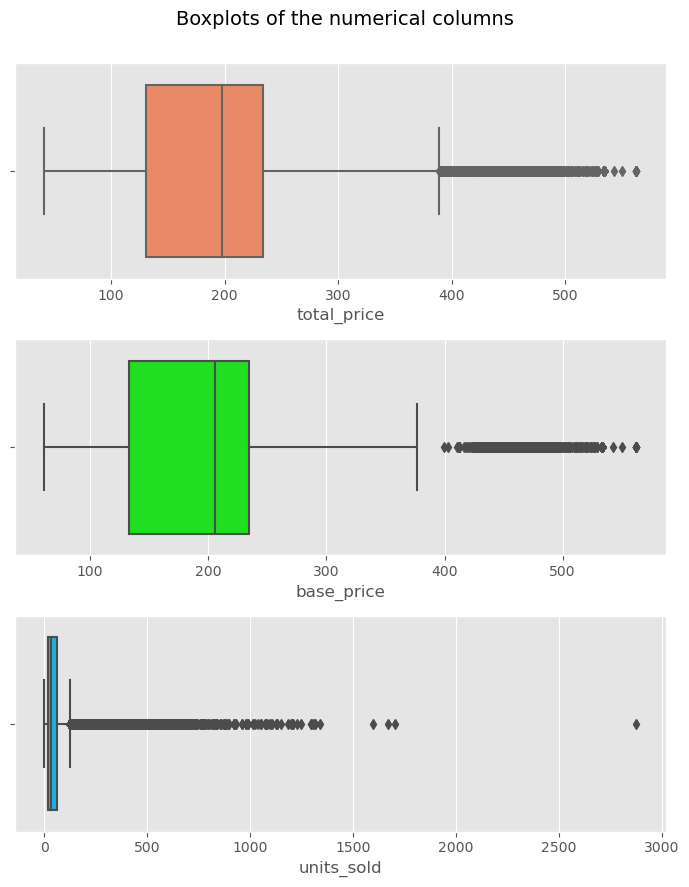

In [12]:
plt.figure(figsize = (7, 3*len(num_col)), dpi = 100)
for i in range(0, len(num_col)):
    plt.suptitle("Boxplots of the numerical columns\n", fontsize = 14)
    plt.subplot(len(num_col), 1, i+1)
    sns.boxplot(ds1[num_col[i]], color = num_colour[i])
plt.tight_layout()
plt.show()

From the above boxplots of the numerical features, we see that some outliers are present in the higher end of **`total_price`** and **`base_price`** column. Since the **`units_sold`** is the target variable, we donot treat the outliers in it. We will first see that how many outliers are present in the data.

In [13]:
base_price_quant25 = ds1["base_price"].quantile(0.25)
base_price_quant75 = ds1["base_price"].quantile(0.75)
base_price_IQR = base_price_quant75 - base_price_quant25
base_price_med = ds1["base_price"].median()
base_price_whis_high = base_price_med+(1.5*base_price_IQR)
base_price_whis_high

357.67499999999995

The value of whisker high for the **`base_price`** is around 360. Any values higher that this are outliers. We now see how many outliers are present in the data.

In [14]:
out_rem_bp_train = ds1[ds1['base_price'] < 380]
no_of_outliers_bp = train.shape[0] - out_rem_bp_train.shape[0]
print(f"Total percentage of outliers: {round((no_of_outliers_bp/train.shape[0])*100, 2)}")

Total percentage of outliers: 11.4


We see that around 11.4% of the total data  in **`base_price`** are outliers. That is a very huge amount of data and they cannot be removed from the dataset as it will result in a huge amount of data loss. Instead we will replace them with the groupby mean of the column.

In [15]:
print("Null values in base_price before outliers removal:", ds1['base_price'].isnull().sum())
ds1['base_price'] = out_rem_bp_train['base_price']
print("Null values in base_price after outliers removal:", ds1['base_price'].isnull().sum())

Null values in base_price before outliers removal: 0
Null values in base_price after outliers removal: 17123


In [16]:
# setting the display option
pd.set_option('display.max_columns', 50)

In [17]:
base_price_mean_train = pd.pivot_table(data = ds1, values = 'base_price', columns = 'sku_id', aggfunc = 'mean')
base_price_mean_train

sku_id,216233,216418,216419,216425,217217,217390,217777,219009,219029,219844,222087,222765,223153,223245,245338,245387,300021,300291,320485,327492,378934,398721,545621,546789,547934,600934,673209,679023
base_price,128.101871,94.688268,94.908763,128.28521,241.532862,158.990538,237.607788,208.554815,314.075856,256.099512,221.041554,229.328888,220.461485,214.878438,365.15625,355.5375,97.744038,130.071442,204.829984,127.046971,204.436294,356.0125,352.660096,208.00772,174.616247,376.9125,352.75601,209.117532


In [18]:
loc1 = ds1['base_price'].isnull()
ds1.loc[loc1, 'base_price'] = ds1.loc[loc1, 'sku_id'].apply(lambda x: base_price_mean_train[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "D:\Important Applications\anaconda3\lib\site-packages\pandas\core\generic.py", line 1668, in __hash__
    raise TypeError(
TypeError: 'Series' objects are mutable, thus they cannot be hashed


In [19]:
print("Null values in base_price after replacing the outilers:", ds1['base_price'].isnull().sum())

Null values in base_price after replacing the outilers: 0


In [20]:
out_rem_bp_test = ds2[ds2['base_price'] < 380]
ds2['base_price'] = out_rem_bp_test['base_price']
loc2 = ds2['base_price'].isnull()
ds2.loc[loc2, 'base_price'] = ds2.loc[loc2, 'sku_id'].apply(lambda x: base_price_mean_train[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "D:\Important Applications\anaconda3\lib\site-packages\pandas\core\generic.py", line 1668, in __hash__
    raise TypeError(
TypeError: 'Series' objects are mutable, thus they cannot be hashed


Now that we have replaced that null values in the **`base_price`** for train and test data, we will treat the outliers in **`total_price`**.

In [21]:
total_price_quant25 = ds1["total_price"].quantile(0.25)
total_price_quant75 = ds1["total_price"].quantile(0.75)
total_price_IQR = total_price_quant75 - total_price_quant25
total_price_med = ds1["total_price"].median()
total_price_whis_high = total_price_med+(1.5*total_price_IQR)
total_price_whis_high

353.04375

In [22]:
out_rem_tp_train = ds1[ds1['total_price'] < 355]
no_of_outliers_tp = train.shape[0] - out_rem_tp_train.shape[0]
print(f"Total percentage of outliers: {round((no_of_outliers_tp/train.shape[0])*100, 2)}")

Total percentage of outliers: 10.13


We see that around 10.13% of the total data  in **`total_price`** are outliers. we will replace them with the groupby mean of the column.

In [23]:
print("Null values in total_price before outliers removal:", ds1['total_price'].isnull().sum())
ds1['total_price'] = out_rem_tp_train['total_price']
print("Null values in total_price after outliers removal:", ds1['total_price'].isnull().sum())

Null values in total_price before outliers removal: 1
Null values in total_price after outliers removal: 15211


In [24]:
total_price_mean_train = pd.pivot_table(data = ds1, values = 'total_price', columns = 'sku_id', aggfunc = 'mean')
total_price_mean_train

sku_id,216233,216418,216419,216425,217217,217390,217777,219009,219029,219844,222087,222765,223153,223245,245338,245387,300021,300291,320485,327492,378934,398721,545621,546789,547934,600934,673209,679023
total_price,124.942208,91.982702,92.349162,125.156355,234.481356,150.867334,232.13854,197.891577,301.903272,244.054947,195.12901,219.760497,206.303241,203.073612,329.616476,329.122044,95.161987,106.181987,200.293692,106.348846,200.036802,328.90168,305.425,197.927802,166.385369,319.186165,305.799519,198.309455


In [25]:
loc2 = ds1['total_price'].isnull()
ds1.loc[loc2, 'total_price'] = ds1.loc[loc2, 'sku_id'].apply(lambda x: total_price_mean_train[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "D:\Important Applications\anaconda3\lib\site-packages\pandas\core\generic.py", line 1668, in __hash__
    raise TypeError(
TypeError: 'Series' objects are mutable, thus they cannot be hashed


In [26]:
print("Null values in total_price after replacing the outilers:", ds1['total_price'].isnull().sum())

Null values in total_price after replacing the outilers: 0


In [27]:
out_rem_tp_test = ds2[ds2['total_price'] < 355]
ds2['total_price'] = out_rem_tp_test['total_price']
loc2 = ds2['total_price'].isnull()
ds2.loc[loc2, 'total_price'] = ds2.loc[loc2, 'sku_id'].apply(lambda x: total_price_mean_train[x])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
  File "D:\Important Applications\anaconda3\lib\site-packages\pandas\core\generic.py", line 1668, in __hash__
    raise TypeError(
TypeError: 'Series' objects are mutable, thus they cannot be hashed


We have treated the outliers present in the data.
## Univariate Analysis of the Categorical Features-
After the nuerical columns, we look at the categorical columns one by one.
### New Columns Formation:
We see that the **`week`** feature has been given to us. We will use it to make new features which would be helpful for the EDA and the model building.
    
* **Day of the week**
* **Week of the Month**
* **Month of the Year**

In [28]:
# defining a function to calculate the week of the month
def week_of_month(n):
    """Takes the date in the input and returns the number of the week for the given month"""
    from calendar import Calendar
    cal = Calendar() # week starts Monday
    #cal = Calendar(6) # week stars Sunday

    weeks = cal.monthdayscalendar(n.year, n.month)
    for x in range(len(weeks)):
        if n.day in weeks[x]:
            return x+1

In [29]:
ds1_dow = ds1['week'].dt.day_name()
ds2_dow = ds2['week'].dt.day_name()

ds1_moy = ds1['week'].dt.month
ds2_moy = ds2['week'].dt.month

ds1_wom = ds1['week'].apply(lambda x: week_of_month(x))
ds2_wom = ds2['week'].apply(lambda x: week_of_month(x))

In [30]:
# Adding columns in train data
ds1['dow'] = ds1_dow
ds1['wom'] = ds1_wom
ds1['moy'] = ds1_moy

# adding columns in the test data
ds2['dow'] = ds2_dow
ds2['wom'] = ds2_wom
ds2['moy'] = ds2_moy

In [31]:
ds1.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,dow,wom,moy
0,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,Monday,4,1
1,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,Monday,4,1
2,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,Monday,4,1
3,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,Monday,4,1
4,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,Monday,4,1


In [32]:
ds2.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dow,wom,moy
0,2013-07-16,8091,216418,108.3000,108.3000,0,0,Tuesday,3,7
1,2013-07-16,8091,216419,109.0125,109.0125,0,0,Tuesday,3,7
2,2013-07-16,8091,216425,133.9500,133.9500,0,0,Tuesday,3,7
3,2013-07-16,8091,216233,133.9500,133.9500,0,0,Tuesday,3,7
4,2013-07-16,8091,217390,176.7000,176.7000,0,0,Tuesday,3,7


In [33]:
ds1.drop(['week'], axis = 1, inplace = True)
ds2.drop(['week'], axis = 1, inplace = True)

In [34]:
# Changing the datatypes to category
ds1['dow'] = ds1['dow'].astype('category')
ds2['dow'] = ds2['dow'].astype('category')

ds1['wom'] = ds1['wom'].astype('category')
ds2['wom'] = ds2['wom'].astype('category')

ds1['moy'] = ds1['moy'].astype('category')
ds2['moy'] = ds2['moy'].astype('category')

In [35]:
cat_col = list(ds1.select_dtypes(include = 'category').columns)
for i in cat_col:
    print(i, ds1[i].nunique())

store_id 76
sku_id 28
is_featured_sku 2
is_display_sku 2
dow 7
wom 6
moy 12


In [36]:
c1 = ['is_featured_sku', 'is_display_sku']
c2 = ['dow', 'wom']

In [37]:
plt.style.use('default')

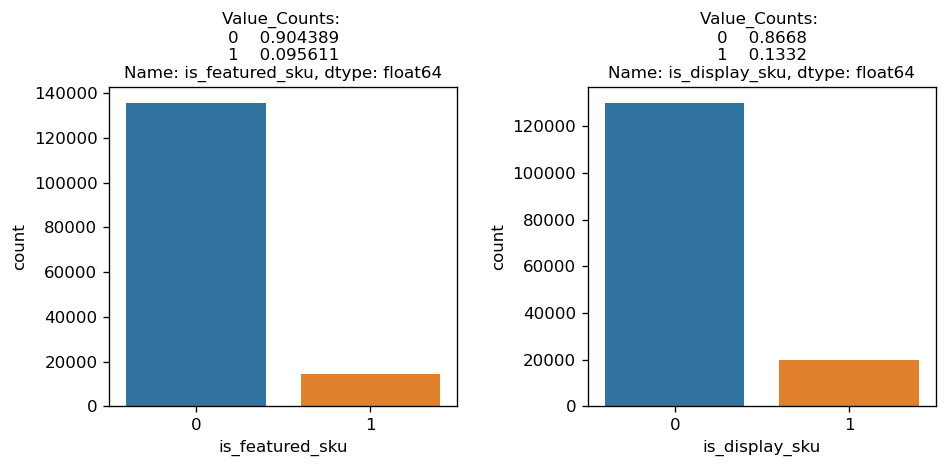

In [38]:
plt.figure(figsize = (8, 4), dpi = 120)
for i in range(len(c1)):
    plt.subplot(1, 2, i+1)
    sns.countplot(ds1[c1[i]])
    plt.title(f"Value_Counts: \n{ds1[c1[i]].value_counts(normalize = True)}", fontsize = 10)
plt.tight_layout(h_pad = 4, w_pad = 2)
plt.show()

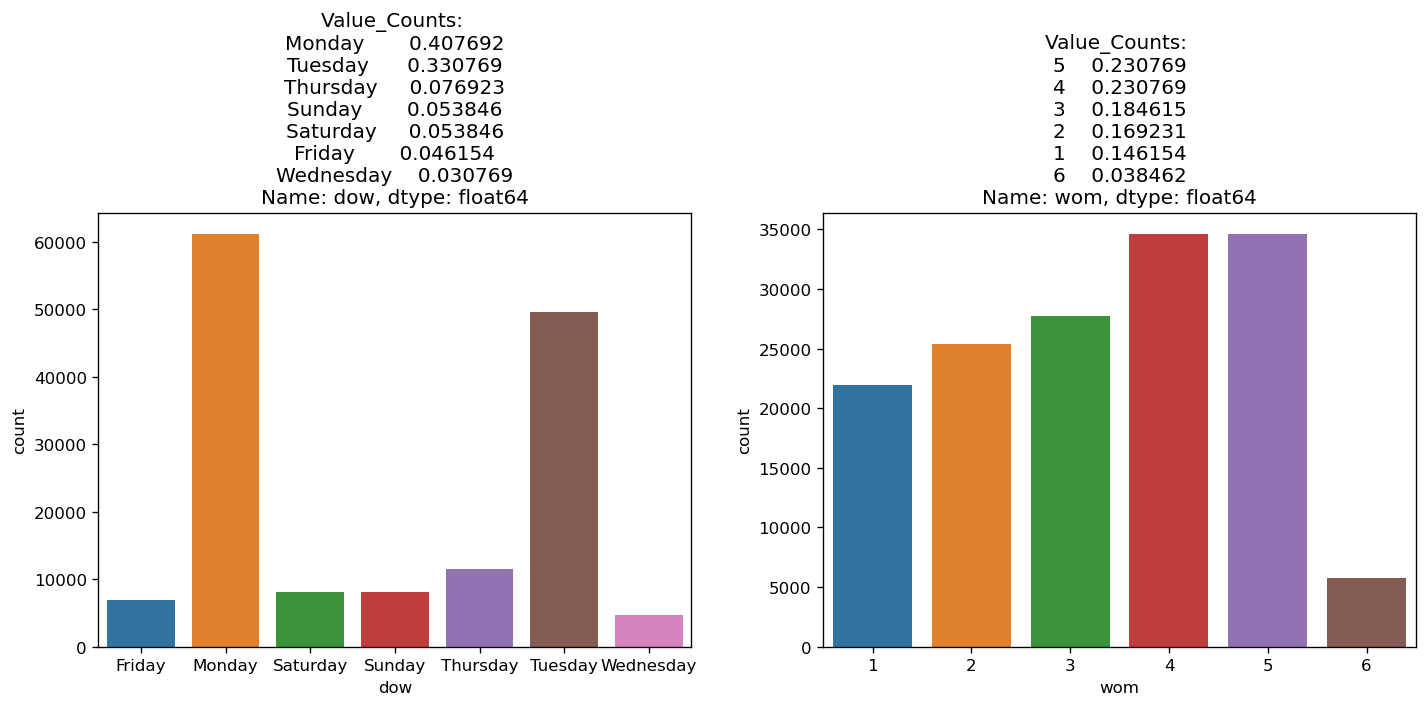

In [39]:
plt.figure(figsize = (12, 6), dpi = 120)
for i in range(len(c2)):
    plt.subplot(1, 2, i+1)
    sns.countplot(ds1[c2[i]])
    plt.title(f"Value_Counts: \n{ds1[c2[i]].value_counts(normalize = True)}", fontsize = 12)
plt.tight_layout(h_pad = 4, w_pad = 2)
plt.show()

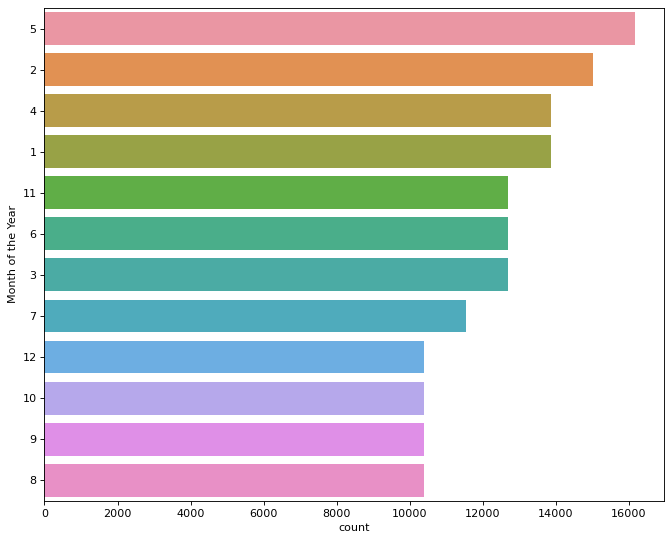

In [40]:
plt.figure(figsize = (10, 8), dpi = 80)
sns.countplot(y = ds1['moy'], order = ds1['moy'].value_counts().index)
plt.ylabel("Month of the Year")
plt.show()

Again from the above countplots of the categorical features, we get a lot of information and insights about the data.
* For the column **`is_featured_sku`**, 90% of the values are 0 or no, whereas only 10% of the total values are 1 or Yes.
* Similarly for the feature **`is_display_sku`**, 86% of the products are not displayed. 14 % of the products are displayed in the stores.
* Most of the data given is for the months of May, February, April, January and May. We have less data for the months of December, October, August and September. Majority of the data is given for the earlier half of the year.
* When talking about the days, most of the data is available for the begining days of the week. Monday, Tuesday alone constitute the 77% of the total data.
* Majority of the data is present for the 4th and 5th week of the month. So the ending of the month has most of the data available.

Some of the hypothesis which we can test are
1. Are the products which are fetured more for the week selling more number of units?
2. Are the products which are displayed more in the store selling more number of units?
3. Does the starting months of the year bring in more sales than then later half of the year?
4. Are more products sold during the end of the month?
5. Does weekends have to more number of sales as compared to week days?

## Bivariate Analysis-
We now have completed the univariate analysis. We move onto the Bivariate Analysis of the data. We start off with the categorical-continous analysis. Here we will look at the reelationshio between the categorical features and target variable. We will also check the different hypothesis that we generated during the univariate analysis.

1. **Does the starting months of the year bring in more sales than then later half of the year?**

In [41]:
most_sells_by_month = ds1.groupby(['moy'])['units_sold'].sum().sort_values(ascending = False).reset_index()
most_sells_by_month

,moy,units_sold
0,5,869648
1,2,862412
2,1,702747
3,6,690137
4,11,651667
5,4,643915
6,3,615777
7,12,595525
8,8,570992
9,7,535454


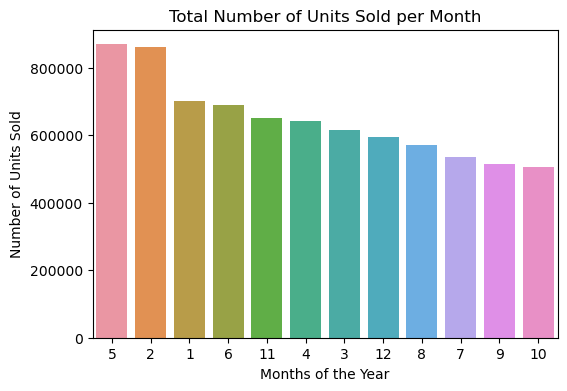

In [42]:
plt.figure(figsize = (6, 4), dpi = 100)
plt.title("Total Number of Units Sold per Month", fontsize = 12)
sns.barplot(data = most_sells_by_month, y = 'units_sold', x = 'moy', 
            order = most_sells_by_month.sort_values('units_sold', ascending = False).moy)
plt.xlabel("Months of the Year")
plt.ylabel("Number of Units Sold")
plt.show()

As we can see from the barplot that the most number of products are being sold at the earlier half of the year as compared to the later half.

2. **Does weekends have to more number of sales as compared to week days?**

In [43]:
most_sells_by_day = ds1.groupby(['dow'])['units_sold'].sum().sort_values(ascending = False).reset_index()
most_sells_by_day

,dow,units_sold
0,Monday,3285968
1,Tuesday,2491504
2,Thursday,620832
3,Sunday,436867
4,Saturday,378230
5,Friday,335315
6,Wednesday,210166


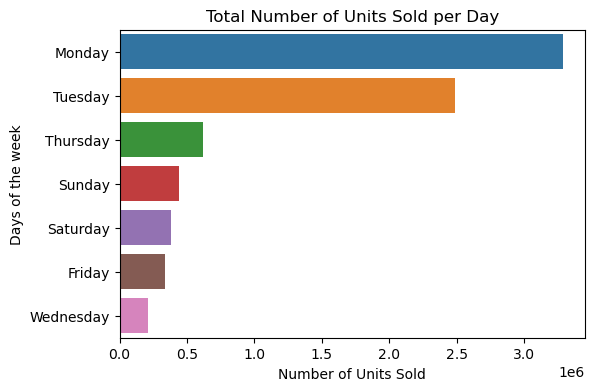

In [44]:
plt.figure(figsize = (6, 4), dpi = 100)
plt.title("Total Number of Units Sold per Day", fontsize = 12)
sns.barplot(data = most_sells_by_day, x = 'units_sold', y = 'dow', 
            order = most_sells_by_day.sort_values('units_sold', ascending = False).dow)
plt.xlabel("Number of Units Sold")
plt.ylabel("Days of the week")
plt.show()

Most number of the products are being sold at starting two days of the week. Weekends aer seeing less number of products being sold.

3. **Are more products sold during the end of the month?**

In [45]:
most_sells_by_week = ds1.groupby(['wom'])['units_sold'].sum().sort_values(ascending = False).reset_index()
most_sells_by_week

,wom,units_sold
0,4,1833170
1,5,1736586
2,3,1503386
3,2,1321513
4,1,1100535
5,6,263692


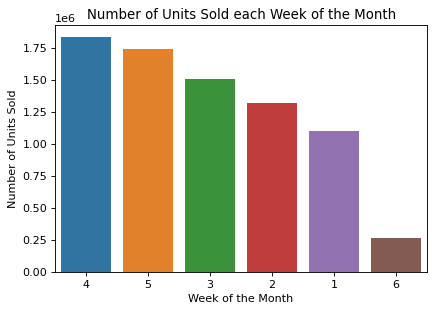

In [46]:
plt.figure(figsize = (6, 4), dpi = 80)
plt.title("Number of Units Sold each Week of the Month", fontsize = 12)
sns.barplot(data = most_sells_by_week, y = 'units_sold', x = 'wom', 
            order = most_sells_by_week.sort_values('units_sold', ascending = False).wom)
plt.xlabel("Week of the Month")
plt.ylabel("Number of Units Sold")
plt.show()

End of the months are bringing in most product sells. To sum up every thing together, **most number of products are being sold during the Mondays and Tuesdays of the last two weeks during May, Februrary, January and June of the years.**

4. **Are the products which are fetured more for the week selling more number of units?**
5. **Are the products which are displayed more in the store selling more number of units?**

In [47]:
# Which products(sku_id) are being sold the most?
most_sells_by_sku = ds1.groupby(['sku_id'])['units_sold'].sum().sort_values(ascending = False).reset_index()
most_sells_by_sku

,sku_id,units_sold
0,219009,964194
1,216418,786087
2,223245,650165
3,216419,628711
4,222087,601228
5,217390,567046
6,222765,478596
7,223153,455473
8,219029,450563
9,216233,450420


We check to see the difference between the top 3 and bottom 3 products.

In [48]:
most_sold = [219009, 216418, 223245]
least_sold = [545621, 673209, 327492]

most_sold_featured_count = ds1[ds1['sku_id'].isin(most_sold)]['is_featured_sku'].value_counts()
least_sold_featured_counts = ds1[ds1['sku_id'].isin(least_sold)]['is_featured_sku'].value_counts()

In [49]:
most_sold_featured_count

0    25730
1     2350
Name: is_featured_sku, dtype: int64

In [50]:
least_sold_featured_counts

0    618
1     32
Name: is_featured_sku, dtype: int64

In [51]:
least_sold_featured_percent = round((least_sold_featured_counts[1]/(least_sold_featured_counts[1] + least_sold_featured_counts[0]))*100, 2)
most_sold_featured_percent = round((most_sold_featured_count[1]/(most_sold_featured_count[1] + most_sold_featured_count[0]))*100, 2)
print(least_sold_featured_percent, most_sold_featured_percent)

4.92 8.37


In [52]:
most_sold_displayed_count = ds1[ds1['sku_id'].isin(most_sold)]['is_display_sku'].value_counts()
least_sold_displayed_counts = ds1[ds1['sku_id'].isin(least_sold)]['is_display_sku'].value_counts()
most_sold_displayed_count

0    23315
1     4765
Name: is_display_sku, dtype: int64

In [53]:
least_sold_displayed_counts

0    589
1     61
Name: is_display_sku, dtype: int64

In [54]:
least_sold_displayed_percent = round((least_sold_displayed_counts[1]/(least_sold_displayed_counts[1] + least_sold_displayed_counts[0]))*100, 2)
most_sold_displayed_percent = round((most_sold_displayed_count[1]/(most_sold_displayed_count[1] + most_sold_displayed_count[0]))*100, 2)
print(least_sold_displayed_percent, most_sold_displayed_percent)

9.38 16.97


In [55]:
details = {
    'Items' : ['Most Sold', 'Least Sold'],
    'featured%' : [most_sold_featured_percent, least_sold_featured_percent],
    'displayed%' : [most_sold_displayed_percent,least_sold_displayed_percent],
}
  
# creating a Dataframe object 
compare_df = pd.DataFrame(details)
  
compare_df

,Items,featured%,displayed%
0,Most Sold,8.37,16.97
1,Least Sold,4.92,9.38


<Figure size 640x480 with 0 Axes>

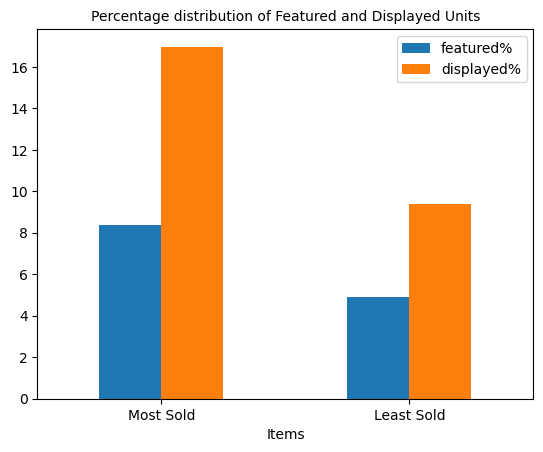

In [56]:
plt.figure(figsize = (8,6), dpi = 80)
compare_df.plot(x="Items",y=["featured%","displayed%"],kind="bar", rot=0)
plt.title("Percentage distribution of Featured and Displayed Units", fontsize = 10)
plt.show()

We see that the products which are being sold the most are features and displayed 50% more that the products which are sold the least for each week.

Once we have done the bivariate cat-cat analysis, we look at the correlation between numerical columns.

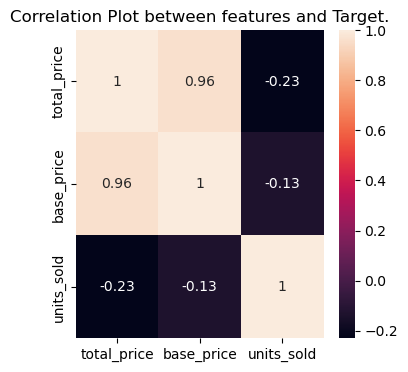

In [57]:
plt.figure(figsize = (4, 4))
plt.title("Correlation Plot between features and Target.")
sns.heatmap(ds1.corr(), annot = True)
plt.show()

As we can see that both the **`total_price`** and **`base_price`** are highly correlated to each other.

# Model Building:
As we have completed the complete EDA and tested different hypothesis and got various insights from the data, we can now move on to the model building. In order to build the model, we need to clean and encode all the features of the data properly.

In [58]:
# Encoding day of the week feature.
ds1['dow'] = ds1['dow'].map({"Monday" : 6, "Tuesday" : 5, "Wednesday" : 0, "Thursday" : 4, "Friday" : 1, "Saturday" : 2, 
                             "Sunday" : 3})
ds2['dow'] = ds2['dow'].map({"Monday" : 6, "Tuesday" : 5, "Wednesday" : 0, "Thursday" : 4, "Friday" : 1, "Saturday" : 2, 
                             "Sunday" : 3})

In [59]:
ds1.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,dow,wom,moy
0,8091,216418,99.0375,111.8625,0,0,20,6,4,1
1,8091,216419,99.0375,99.0375,0,0,28,6,4,1
2,8091,216425,133.9500,133.9500,0,0,19,6,4,1
3,8091,216233,133.9500,133.9500,0,0,44,6,4,1
4,8091,217390,141.0750,141.0750,0,0,52,6,4,1


In [60]:
ds2.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,dow,wom,moy
0,8091,216418,108.3000,108.3000,0,0,5,3,7
1,8091,216419,109.0125,109.0125,0,0,5,3,7
2,8091,216425,133.9500,133.9500,0,0,5,3,7
3,8091,216233,133.9500,133.9500,0,0,5,3,7
4,8091,217390,176.7000,176.7000,0,0,5,3,7


As we can see that all the features have been encoded. But, the scale of the data is not correct, so we scale the data using a Min-Max Scaler.

In [61]:
y = ds1['units_sold'].copy()
x = ds1.drop(['units_sold'], axis = 1).copy()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

max_accuracy = 0 # maximum accuracy
best_rs = 0 # best random state
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy}")

Best Random State is 78, 0.3059360990613462


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 78)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [66]:
y_train = np.log(y_train)
y_train

55875     3.433987
24526     2.708050
148416    2.995732
123188    3.970292
25022     4.174387
            ...   
3476      3.806662
112756    3.526361
104758    3.135494
16854     4.043051
105157    3.713572
Name: units_sold, Length: 112612, dtype: float64

In [67]:
lr = LinearRegression(n_jobs = 3)
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

In [68]:
pred_lr = np.exp(pred_lr)

In [69]:
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_absolute_error as mae

In [70]:
print("The root mean squared log error of the fitted model is", np.sqrt(msle(y_test, pred_lr)))

The root mean squared log error of the fitted model is 0.7208797750144876


We have a root mean squared log error of 0.72. Now we predict the final values for the test data.

In [71]:
ds2_final = scale.transform(ds2)

In [72]:
final_prediction = lr.predict(ds2_final)

In [73]:
final_prediction = np.exp(final_prediction)
final_prediction

array([45.49425091, 45.39126586, 41.93353169, ..., 60.78563428,
       11.73364782,  6.97039447])

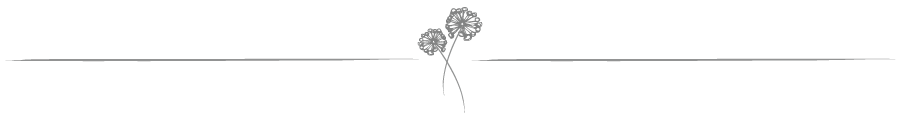